# Решение нелинейных уравнений

Подмодуль [scipy.optimize](https://docs.scipy.org/doc/scipy/reference/optimize.html#module-scipy.optimize) также содержит в себе методы для поиска корней нелинейных уравнений и их систем.

## Поиск корня скалярной функции одного аргумента

Функция [scipy.optimize.root_scalar](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.root_scalar.html#scipy.optimize.root_scalar) позволяет искать корни функции $f: \mathbb{R} \to \mathbb{R}$:

$$
f(x) = 0.
$$

Функция `root_scalar` предоставляет доступ к разным методам поиска корней, таким как `newton`, `bisect`, `secant` и многим другим. Какие-то из этих методов ищут корень внутри отрезка `bracket`, а другие ищут корень, начиная с какого-то начального приближения `x0`. 

      converged: True
           flag: 'converged'
 function_calls: 46
     iterations: 44
           root: 1.0000000000002274


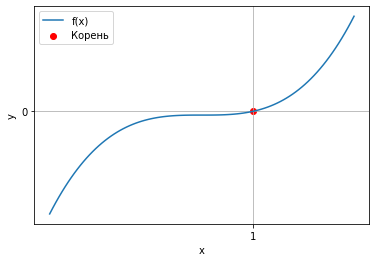

In [12]:
import numpy as np
from scipy import optimize
from matplotlib import pyplot as plt


def f(x):
    return x**3 - 1

def fprime(x):
    return 3 * x**2


sol = optimize.root_scalar(f, bracket=[-10, 10], method="bisect")
print(sol)


x = np.linspace(-3, 3, 100)
plt.plot(x, f(x))
plt.scatter(sol.root, f(sol.root), color="r")
plt.xticks([1])
plt.yticks([0])
plt.xlabel("x")
plt.ylabel("y")
plt.legend(["f(x)", "Корень"])
plt.grid()

Метод бисекции сошелся за 44 итерации. Проверим метод Ньютона.

In [13]:
sol = optimize.root_scalar(f, fprime=fprime, x0=10, method="newton")
print(sol)

      converged: True
           flag: 'converged'
 function_calls: 22
     iterations: 11
           root: 1.0


Метод Ньютона сошелся за 11 итераций.

## Решение системы нелинейных уравнений.

Функция $F$ предназначена для поиска корней уравнений вида

$$
F(x) = 0,
$$

где $x$ и $F(x)$ многомерны, т.е. таких систем 

$$
\begin{cases}
f_1(x_1, ..., x_n) = 0 \\
\cdots \\
f_n(x_1, ..., x_n) = 0
\end{cases}.
$$

Рассмотрим поиск корня на примере функции 

$$
\begin{cases}
x_1 + \frac{(x_1 - x_2)^3}{2} = 1 \\
\frac{(x_2 - x_1)^3}{2} + x_2 = 1
\end{cases}.
$$

Матрица Якоби этого уравнения имеет вид

$$
\begin{pmatrix}
1 + \frac{3}{2}(x_2 - x_1)^2 & \frac{3}{2}(x_2 - x_1)^2 \\
\frac{3}{2}(x_2 - x_1)^2 & 1 + \frac{3}{2}(x_2 - x_1)^2
\end{pmatrix},
$$

а единственный действительный корень которой

$$
\begin{cases}
x_1 = 1 \\
x_2 = 1
\end{cases}.
$$

In [31]:
import numpy as np
from scipy import optimize
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def f(x):
    x = np.array(x)
    return np.array([
        x[0]  + 0.5 * (x[0] - x[1])**3 - 1.0,
        0.5 * (x[1] - x[0])**3 + x[1] - 1.0
        ])


def jac(x):
    return np.array([[1 + 1.5 * (x[0] - x[1])**2,
                      -1.5 * (x[0] - x[1])**2],
                     [-1.5 * (x[1] - x[0])**2,
                      1 + 1.5 * (x[1] - x[0])**2]])


root = optimize.root(f, x0 = [0, 0])  
print(root)  

    fjac: array([[-0.89914291,  0.43765515],
       [-0.43765515, -0.89914291]])
     fun: array([-1.11022302e-16,  0.00000000e+00])
 message: 'The solution converged.'
    nfev: 12
     qtf: array([ 1.19565972e-11, -4.12770392e-12])
       r: array([-2.16690469,  1.03701789, -1.10605417])
  status: 1
 success: True
       x: array([0.8411639, 0.1588361])


In [32]:
root = optimize.root(f, jac=jac, x0 = [0, 0], method="hybr")  
print(root)  

    fjac: array([[ 0.89914291, -0.43765515],
       [ 0.43765515,  0.89914291]])
     fun: array([-1.11022302e-16,  0.00000000e+00])
 message: 'The solution converged.'
    nfev: 10
    njev: 1
     qtf: array([-1.19565972e-11,  4.12770392e-12])
       r: array([ 2.16690469, -1.03701789,  1.10605417])
  status: 1
 success: True
       x: array([0.8411639, 0.1588361])
